In [119]:
import  pandas as pd
df = pd.read_csv('consumer_complaints.csv',low_memory=False)
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
date_received                   555957 non-null object
product                         555957 non-null object
sub_product                     397635 non-null object
issue                           555957 non-null object
sub_issue                       212622 non-null object
consumer_complaint_narrative    66806 non-null object
company_public_response         85124 non-null object
company                         555957 non-null object
state                           551070 non-null object
zipcode                         551452 non-null object
tags                            77959 non-null object
consumer_consent_provided       123458 non-null object
submitted_via                   555957 non-null object
date_sent_to_company            555957 non-null object
company_response_to_consumer    555957 non-null object
timely_response                 555957 non-null object
consumer_dis

In [121]:
from io import StringIO

In [122]:
col = ['product','consumer_complaint_narrative']
df = df[col]
df = df[pd.notnull(df['consumer_complaint_narrative'])]
df.head()

,product,consumer_complaint_narrative
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,Consumer Loan,Due to inconsistencies in the amount owed that...
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...
190207,Mortgage,I have an open and current mortgage with Chase...
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...


In [123]:
df.columns = ['Product', 'Consumer_complaint_narrative']

In [124]:
df['category_id'] = df['Product'].factorize()[0]
df.head()


,Product,Consumer_complaint_narrative,category_id
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...,0
190135,Consumer Loan,Due to inconsistencies in the amount owed that...,1
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...,2
190207,Mortgage,I have an open and current mortgage with Chase...,2
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...,2


In [125]:
category_id_df = df[['Product','category_id']].drop_duplicates().sort_values('category_id')
category_id_df

,Product,category_id
190126,Debt collection,0
190135,Consumer Loan,1
190155,Mortgage,2
190263,Credit card,3
191477,Credit reporting,4
191554,Student loan,5
192044,Bank account or service,6
192412,Payday loan,7
195610,Money transfers,8
196507,Other financial service,9


In [126]:
category_to_id = dict(category_id_df.values)
category_to_id

{'Bank account or service': 6,
 'Consumer Loan': 1,
 'Credit card': 3,
 'Credit reporting': 4,
 'Debt collection': 0,
 'Money transfers': 8,
 'Mortgage': 2,
 'Other financial service': 9,
 'Payday loan': 7,
 'Prepaid card': 10,
 'Student loan': 5}

In [127]:
id_to_category = dict(category_id_df[['category_id','Product']].values)
id_to_category

{0: 'Debt collection',
 1: 'Consumer Loan',
 2: 'Mortgage',
 3: 'Credit card',
 4: 'Credit reporting',
 5: 'Student loan',
 6: 'Bank account or service',
 7: 'Payday loan',
 8: 'Money transfers',
 9: 'Other financial service',
 10: 'Prepaid card'}

In [129]:
df.info()
df = df[:18680]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66806 entries, 190126 to 553096
Data columns (total 3 columns):
Product                         66806 non-null object
Consumer_complaint_narrative    66806 non-null object
category_id                     66806 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18680 entries, 190126 to 253360
Data columns (total 3 columns):
Product                         18680 non-null object
Consumer_complaint_narrative    18680 non-null object
category_id                     18680 non-null int64
dtypes: int64(1), object(2)
memory usage: 583.8+ KB


In [131]:
df.groupby('category_id')['Consumer_complaint_narrative'].count()

category_id
0     5296
1      947
2     4334
3     2115
4     3243
5      708
6     1467
7      217
8      201
9       31
10     121
Name: Consumer_complaint_narrative, dtype: int64

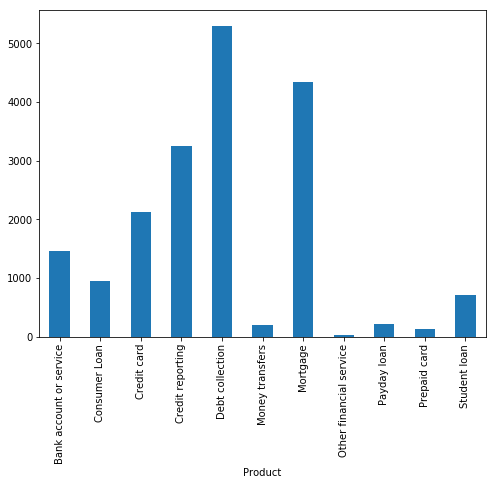

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8,6))
df.groupby('Product')['Consumer_complaint_narrative'].count().plot.bar(ylim=0)

In [133]:
df.head()

,Product,Consumer_complaint_narrative,category_id
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...,0
190135,Consumer Loan,Due to inconsistencies in the amount owed that...,1
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...,2
190207,Mortgage,I have an open and current mortgage with Chase...,2
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...,2


In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

(18680, 47878)

In [135]:
#find correlation with the procuct

from sklearn.feature_selection import chi2
import numpy as np

N=2
for product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels==category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' '))==1]
    bigrams = [v for v in feature_names if len(v.split(' '))==2]
    print("# ' {}':".format(product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# ' Bank account or service':
  . Most correlated unigrams:
. deposit
. overdraft
  . Most correlated bigrams:
. checking account
. overdraft fees
# ' Consumer Loan':
  . Most correlated unigrams:
. car
. vehicle
  . Most correlated bigrams:
. auto finance
. auto loan
# ' Credit card':
  . Most correlated unigrams:
. synchrony
. card
  . Most correlated bigrams:
. annual fee
. credit card
# ' Credit reporting':
  . Most correlated unigrams:
. experian
. equifax
  . Most correlated bigrams:
. equifax xxxx
. credit report
# ' Debt collection':
  . Most correlated unigrams:
. collection
. debt
  . Most correlated bigrams:
. collection agency
. collect debt
# ' Money transfers':
  . Most correlated unigrams:
. western
. moneygram
  . Most correlated bigrams:
. money transfer
. western union
# ' Mortgage':
  . Most correlated unigrams:
. modification
. mortgage
  . Most correlated bigrams:
. mortgage company
. loan modification
# ' Other financial service':
  . Most correlated unigrams:
. t

In [136]:
tfidf.get_feature_names()[1250:1280]

['430 00',
 '4300',
 '4300 00',
 '43000',
 '43000 00',
 '44',
 '44 00',
 '440',
 '440 00',
 '4400',
 '4400 00',
 '44000',
 '44000 00',
 '45',
 '45 00',
 '45 day',
 '45 days',
 '45 minutes',
 '450',
 '450 00',
 '4500',
 '4500 00',
 '45000',
 '45000 00',
 '450000',
 '450000 00',
 '46',
 '46 00',
 '460',
 '460 00']

In [137]:
tfidf.vocabulary_

{'xxxx': 45346,
 'claimed': 9184,
 'owe': 29016,
 '27': 1066,
 '00': 0,
 'years': 47688,
 'despite': 13764,
 'proof': 32399,
 'payment': 29982,
 'sent': 37825,
 'canceled': 7611,
 'check': 8844,
 'invoice': 21968,
 'continue': 11037,
 'insist': 21618,
 'collection': 9535,
 'agencies': 3394,
 'stop': 39924,
 'harassment': 19358,
 'paid': 29208,
 'ago': 3598,
 'xxxx claimed': 45768,
 'claimed owe': 9191,
 '27 00': 1067,
 '00 xxxx': 498,
 'xxxx years': 47534,
 'years despite': 47725,
 'despite proof': 13779,
 'proof payment': 32444,
 'payment sent': 30350,
 'canceled check': 7614,
 '00 continue': 136,
 'insist owe': 21620,
 'owe collection': 29036,
 'collection agencies': 9543,
 'stop harassment': 39940,
 'paid years': 29415,
 'years ago': 47693,
 'inconsistencies': 20895,
 'owed': 29078,
 'told': 41865,
 'bank': 5683,
 'reported': 35401,
 'credit': 11716,
 'reporting': 35469,
 'advised': 3238,
 'write': 45174,
 'good': 18886,
 'letter': 23382,
 'order': 28752,
 'address': 3027,
 'issue':

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train,X_test,y_train,y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)

In [139]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [140]:
X_train_counts.toarray()[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [141]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [142]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [143]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


In [144]:
print(clf.predict(count_vect.transform(["i recently closed and paid off my citizens bank credit card account ove one month ago. Today i received a call from them saying that my account was past due.now, they never sent me a letter in the mail saying that i owed them money after i have requested a payoff and paid the balance in full. they are attempting to report my account past due for 33 days with the credit reporting agencies. i have worked tirelessly to build my credit, and now Citizens bank wants to destroy over {$27.00} when they never had any type of notification in place to make me aware of the balance."])))

['Debt collection']


In [145]:
df.Consumer_complaint_narrative.iloc[78],df.Product.iloc[78]

('i recently closed and paid off my citizens bank credit card account ove one month ago. Today i received a call from them saying that my account was past due.now, they never sent me a letter in the mail saying that i owed them money after i have requested a payoff and paid the balance in full. they are attempting to report my account past due for 33 days with the credit reporting agencies. i have worked tirelessly to build my credit, and now Citizens bank wants to destroy over {$27.00} when they never had any type of notification in place to make me aware of the balance. \n',
 'Credit card')

                model_name  fold_idx  accuracy
0   RandomForestClassifier         0  0.427044
1   RandomForestClassifier         1  0.426164
2   RandomForestClassifier         2  0.434538
3   RandomForestClassifier         3  0.428074
4   RandomForestClassifier         4  0.423098
5                LinearSVC         0  0.857296
6                LinearSVC         1  0.840824
7                LinearSVC         2  0.839893
8                LinearSVC         3  0.836860
9                LinearSVC         4  0.846731
10      LogisticRegression         0  0.837253
11      LogisticRegression         1  0.821295
12      LogisticRegression         2  0.821419
13      LogisticRegression         3  0.815430
14      LogisticRegression         4  0.821275
15           MultinomialNB         0  0.699091
16           MultinomialNB         1  0.696362
17           MultinomialNB         2  0.701205
18           MultinomialNB         3  0.694616
19           MultinomialNB         4  0.694534


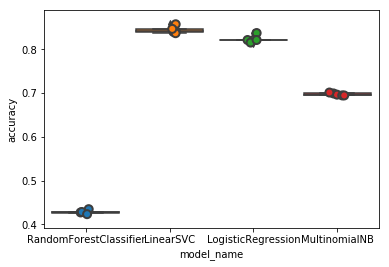

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

models = [RandomForestClassifier(n_estimators=200,max_depth=3,random_state=0),
         LinearSVC(),LogisticRegression(random_state=0),MultinomialNB()]

CV=5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy',cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name','fold_idx', 'accuracy'])

print(cv_df)

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [147]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.844321
LogisticRegression        0.823334
MultinomialNB             0.697161
RandomForestClassifier    0.427784
Name: accuracy, dtype: float64

In [148]:
#Model evaluation
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features,labels,df.index, test_size=0.33, random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

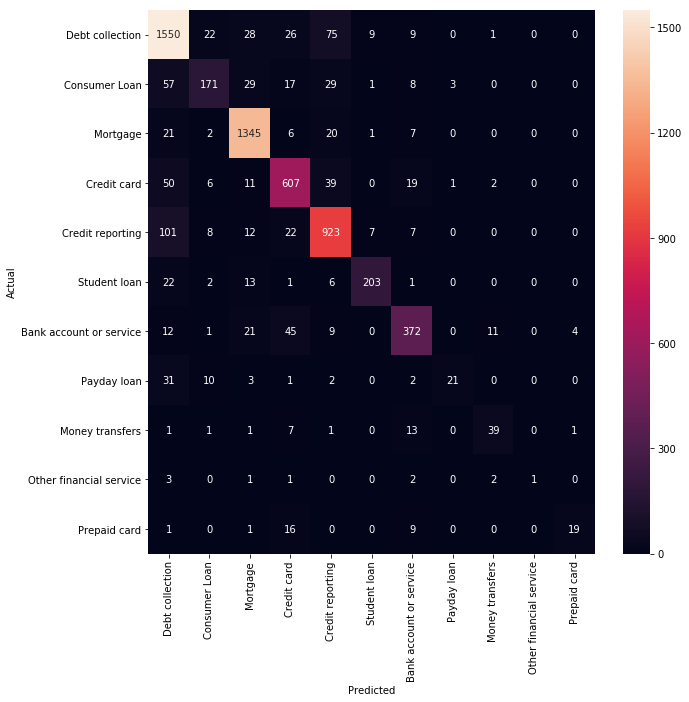

In [149]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id_df.Product.values,yticklabels=category_id_df.Product.values )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [150]:
from IPython.display import display
for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 10:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
            print('')


'Consumer Loan' predicted as 'Debt collection' : 57 examples.


,Product,Consumer_complaint_narrative
251852,Consumer Loan,I have entered into a Debt relief program and ...
217111,Consumer Loan,See Case # Case number : XXXX Please add and R...
230612,Consumer Loan,Santander accepted a settlement after an auto ...
232713,Consumer Loan,Check n go XXXX have zero tolerance for their ...
241284,Consumer Loan,I was contacted by Star Cash XXXX XXXX at a ti...
245049,Consumer Loan,"I have been harassed, called before XXXX my ti..."
251325,Consumer Loan,XXXX We did a 6 month same as cash with them w...
213078,Consumer Loan,"I would like to report CNAC, dba car now aacce..."
227596,Consumer Loan,I continue to get automated calls to my work c...
252302,Consumer Loan,"payment not late, creditor calls XXXX a day st..."



'Mortgage' predicted as 'Debt collection' : 21 examples.


,Product,Consumer_complaint_narrative
219295,Mortgage,Received letter from Money Network in the mail...
240359,Mortgage,We are in a hardship and received a letter reg...
252201,Mortgage,Ongoing collections calls for an XXXX XXXX who...
220839,Mortgage,The attached complaint was initially written t...
227627,Mortgage,I received a phone call today from a man at ar...
234799,Mortgage,In XX/XX/XXXX my husband & I received a mortga...
249056,Mortgage,My account was paid and included XX/XX/XXXX Ch...
249875,Mortgage,Following My Chapter XXXX bankruptcy discharge...
233227,Mortgage,"On Monday, XXXX XXXX, 2015, I received a lette..."
248185,Mortgage,Greentree has continued to attempt to collect ...



'Credit card' predicted as 'Debt collection' : 50 examples.


,Product,Consumer_complaint_narrative
217440,Credit card,For a medical service my wife made an advance ...
219491,Credit card,"FIA Card Services ( FIA ), issued me personall..."
248592,Credit card,"For over XXXX years, AAFES charged me directly..."
209642,Credit card,I was called on my cell phone by a man name XX...
226919,Credit card,My husband has a Bill me Later/Pay pal account...
240345,Credit card,On XX/XX/XXXX I was contacted by XXXX of XXXX ...
234211,Credit card,I have a JC Penney credit card that is being s...
221331,Credit card,SEARS claims I have a balance with them and ne...
225324,Credit card,A company called THD/CBNA is reporting a charg...
252362,Credit card,My XXXX is XXXX years old and has been XXXX. H...



'Credit reporting' predicted as 'Debt collection' : 101 examples.


,Product,Consumer_complaint_narrative
244179,Credit reporting,I have found a XXXX acct with negative remarks...
251140,Credit reporting,At the time of this visit to the hospital I wa...
226638,Credit reporting,my boat trailer was stolen. I never received p...
251121,Credit reporting,I am writing to dispute the accounts reference...
251093,Credit reporting,I have several accounts that are listed with t...
238920,Credit reporting,There are XXXX unknown collection posted on my...
237948,Credit reporting,XXXX XXXX Bank XXXX XXXX As per the Florida st...
240948,Credit reporting,i just retired from the XXXX how can i have a ...
228179,Credit reporting,My cell phone contract ended XXXX of 2012 (? i...
229039,Credit reporting,I am filing a complaint against NCC Business S...



'Student loan' predicted as 'Debt collection' : 22 examples.


,Product,Consumer_complaint_narrative
210937,Student loan,Enterprise Recovery System continues to contac...
242457,Student loan,I have being paying my student loan ( {$500.00...
223341,Student loan,"Back in XXXX, I co-signed a non-federal privat..."
245840,Student loan,I had taken a student loan for XXXX XXXX XXXX ...
244899,Student loan,i have a private loan which originated in XXXX...
249638,Student loan,I originally had a loan with a cosigner with X...
211714,Student loan,I received a collection on my credit report in...
192472,Student loan,"I was behind on my loans, and I called about t..."
213818,Student loan,I am in debt with Sallie Mae and it is a delin...
238463,Student loan,I cosigned a loan for a nephew which he defaul...



'Bank account or service' predicted as 'Debt collection' : 12 examples.


,Product,Consumer_complaint_narrative
241025,Bank account or service,I get calls everyday around XXXX from BB & T B...
216180,Bank account or service,you can not get your statements on line of wha...
250853,Bank account or service,Wells Fargo has been issued a judgement agains...
233990,Bank account or service,I have faxed and mailed US Bank numerous lette...
235727,Bank account or service,Funding suite/ XXXX located at XXXX XXXX XXXX ...
243927,Bank account or service,I had my paycheck direct deposited into US Ban...
247363,Bank account or service,A company known as First Data is phoning a fri...
223582,Bank account or service,I called and requested that my paper statement...
236914,Bank account or service,""" Google XXXX XXXX '' calls XXXX or XXXX times..."
245029,Bank account or service,"My husband, XXXX XXXX, and I filed a Chapter X..."



'Payday loan' predicted as 'Debt collection' : 31 examples.


,Product,Consumer_complaint_narrative
232095,Payday loan,I have been contacted by a XXXX XXXX of XXXX X...
231791,Payday loan,I live in Ohio and took a loan from Westernsky...
213221,Payday loan,My complaint is about unfair business practice...
230579,Payday loan,"Someone keep calling me from XXXX,XXXX. Statin..."
238265,Payday loan,In 2012 I borrowed money from Spot on Loans an...
207432,Payday loan,I received a payday loan in 2013 ... .circumst...
248762,Payday loan,I received a phone call from an unknown number...
238654,Payday loan,I took out a loan with Westen Sky and it was i...
216062,Payday loan,I have received a call from XXXX XXXX XXXX XXX...
242554,Payday loan,I took out a short-term payday loan for XXXX. ...



'Debt collection' predicted as 'Consumer Loan' : 22 examples.


,Product,Consumer_complaint_narrative
208735,Debt collection,My daughter recently filed for bankruptcy and ...
209123,Debt collection,I had recently made settlement arrangements wi...
247398,Debt collection,Called harassing me at work when I am not allo...
236126,Debt collection,I was not able to finance a car through CNAC w...
241297,Debt collection,My car was stolen in I believe it was XXXX. Th...
218178,Debt collection,I purchased a computer through XXXX on XXXX 20...
247585,Debt collection,M @ T bank keeps reporting late payment I had ...
245919,Debt collection,I purchased a used car and purchased Gap ins a...
220245,Debt collection,This company has been pulling my credit random...
230373,Debt collection,They are also calling XXXX XXXX XXXX. I have r...



'Payday loan' predicted as 'Consumer Loan' : 10 examples.


,Product,Consumer_complaint_narrative
201015,Payday loan,I ran into a finacial crunch had to borrow som...
226006,Payday loan,I revoked my ACH option for the loan. The loan...
222126,Payday loan,"We needed money to pay the rent, car, and food..."
227207,Payday loan,I received a payday loan for XXXX dollars. I w...
209350,Payday loan,{$4000.00} I rec 'd a Loan online from Cash Ce...
231659,Payday loan,"Hello, This loan I borrowed from XXXX Cash on ..."
243443,Payday loan,During a financial emergency I sought a fast p...
206518,Payday loan,I received a letter from Worth Finance Corp th...
218529,Payday loan,I was in a bind and took out a loan with Castl...
251157,Payday loan,I had my identity stolen. I had fraud alerts p...



'Debt collection' predicted as 'Mortgage' : 28 examples.


,Product,Consumer_complaint_narrative
244417,Debt collection,I was told that the mortgage was paid in full ...
229956,Debt collection,Bank of America hired a firm to sue consumer i...
241448,Debt collection,PNC Mortgage is not allowing a short sale to p...
239658,Debt collection,Dear CFPB-I was served court documents by the ...
226267,Debt collection,There is a XXXX lien attached to my property w...
246181,Debt collection,"When I changed my residence, I tried to transf..."
229401,Debt collection,Please see and read the attachments. These can...
209649,Debt collection,"Please help me as a loan servicer, XXXX Mortga..."
222273,Debt collection,I had a mobile home in XXXX - and moved west t...
201512,Debt collection,I applied for a payday loan to help my XXXX so...



'Consumer Loan' predicted as 'Mortgage' : 29 examples.


,Product,Consumer_complaint_narrative
214768,Consumer Loan,I have made my loan payment as agreed without ...
235401,Consumer Loan,I am currently waiting on approval on a home m...
210442,Consumer Loan,During deployment turning in my SCRA documents...
234239,Consumer Loan,We had a Bank of America home equity loan prot...
214070,Consumer Loan,"On XXXX XXXX, XX/XX/2015 my father and I went ..."
246568,Consumer Loan,I got a loan from Cash Call for {$2500.00} - a...
238277,Consumer Loan,I applied for a home equity line of credit at ...
247508,Consumer Loan,I have attached a detailed letter outlining th...
230708,Consumer Loan,I took out a loan with XXXX XXXX in XXXX of XX...
200343,Consumer Loan,"Since XXXX XXXX, XX/XX/2015, I have unsuccessf..."



'Credit card' predicted as 'Mortgage' : 11 examples.


,Product,Consumer_complaint_narrative
240979,Credit card,I submitted a payment on my credit card at Wel...
239549,Credit card,"Well, I have filed a compliant against Bank Of..."
221470,Credit card,"About six months ago, I submitted a complaint ..."
242588,Credit card,"Foreclosure, loss of job, bereavement grief. M..."
212648,Credit card,Opened up secured visa account with Fifth Thir...
226482,Credit card,I have submitted a complaint against Citibank ...
233749,Credit card,A property has an insurance for flood that is ...
237874,Credit card,I requested a {$5000.00} increase to my Bank o...
244600,Credit card,"Chase card services, like most financial provi..."
225065,Credit card,THE STATEMENTS WERE MAILED TO MY ADDRESS INSTE...



'Credit reporting' predicted as 'Mortgage' : 12 examples.


,Product,Consumer_complaint_narrative
229110,Credit reporting,My fathers location is where my tax form was s...
217548,Credit reporting,My name is XXXX XXXX. My date of birth is XX/X...
241246,Credit reporting,"I 'm am trying to clean up my credit, during t..."
250664,Credit reporting,I filed Chapter XXXX XX/XX/XXXX and was grante...
216994,Credit reporting,"I filed bankruptcy on XXXX XXXX, and my mortga..."
237174,Credit reporting,I am a XXXX veteran. I had fallen and I told t...
210828,Credit reporting,"Mortgage note sold multiple time, note was dis..."
248282,Credit reporting,"In XXXX, I missed a payment on my mortgage due..."
249584,Credit reporting,Credit reporting agencies have a bankrubtcy in...
230968,Credit reporting,XXXX XXXX XXXX XXXX failed to electronically v...



'Student loan' predicted as 'Mortgage' : 13 examples.


,Product,Consumer_complaint_narrative
245417,Student loan,I have a few loans with Chase bank. I have bee...
232158,Student loan,Genesis loan servicing no longer has any corre...
233030,Student loan,Citibank fails to issue me a statement when I ...
251292,Student loan,"In a discussion regarding repayment, my proces..."
226187,Student loan,I took out a loan for roughly {$5000.00} back ...
236747,Student loan,In XXXX of 2015 we sent in XXXX payments for b...
218844,Student loan,To Whom It May Concern : PROBLEM : XXXX XXXX H...
245496,Student loan,The loan company Naviance did not notify me of...
235002,Student loan,I have been paying on this debt for over 7 yea...
234296,Student loan,The loan is through Wells Fargo. I am the co-s...



'Bank account or service' predicted as 'Mortgage' : 21 examples.


,Product,Consumer_complaint_narrative
225187,Bank account or service,XXXX children submitted a Power of Attorney fo...
234332,Bank account or service,Bank of America ( XXXX ) will not close the cl...
203658,Bank account or service,Notarized FHA modification documents XXXX time...
251761,Bank account or service,I had a Mortgage with XXXX in XX/XX/XXXX they ...
241771,Bank account or service,"on XX/XX/XXXX i made acheck payable to, XXXX X..."
218682,Bank account or service,In XXXX of XXXX I made an offer to buy a house...
238647,Bank account or service,I have applied for a home mortgage with Americ...
251163,Bank account or service,"My ex-wife and I owned a property, with the Mo..."
234648,Bank account or service,I have been a Citibank gold customer for 40 yr...
228880,Bank account or service,XXXX 2015 : I called to make a payment on XXXX...



'Debt collection' predicted as 'Credit card' : 26 examples.


,Product,Consumer_complaint_narrative
219185,Debt collection,In XXXX Capital One filed a XXXX with IRS for ...
245118,Debt collection,Executive financial company contacted me back ...
202225,Debt collection,XXXX rewards card transferred to Capital One. ...
218118,Debt collection,I had a discover card with payment protection ...
240929,Debt collection,when i closed by XXXX XXXX account i paid my b...
224384,Debt collection,This concerns a settlement agreement between C...
223852,Debt collection,"My JCPenney account has been frozen, I am bein..."
246555,Debt collection,For the last three weeks I have been getting l...
208032,Debt collection,I mailed a certified letter to Capital One on ...
244632,Debt collection,I opened a credit card with walmart/ GE Money ...



'Consumer Loan' predicted as 'Credit card' : 17 examples.


,Product,Consumer_complaint_narrative
199211,Consumer Loan,TD Bank consistently applies my payment signif...
236869,Consumer Loan,"XXXX XXXX represents a "" time-share '' company..."
211729,Consumer Loan,In XX/XX/XXXX My wife had dental work done at ...
240384,Consumer Loan,We have a loan with XXXX. It shows up on our c...
216797,Consumer Loan,We made a electronic bill pay through our bank...
237135,Consumer Loan,I somehow got multiple paypal accounts with XX...
221652,Consumer Loan,DISCOVER PERSONAL LOANS IS ADVERTISING AN INTE...
250731,Consumer Loan,Wells Fargo Dealer Services is refusing to hon...
218018,Consumer Loan,I filed a dispute with AMERICAN EXPRESS in reg...
214603,Consumer Loan,"We, my wife XXXX and I, entered into an agreem..."



'Credit reporting' predicted as 'Credit card' : 22 examples.


,Product,Consumer_complaint_narrative
221372,Credit reporting,someone in Kentucky used my master card to buy...
251259,Credit reporting,There is XXXX credit card account with XXXX XX...
250896,Credit reporting,There is a XXXX credit card open in my name th...
230336,Credit reporting,I initially went on XXXX to get my free credit...
239064,Credit reporting,We agreed to a settlement via phone with Capit...
240329,Credit reporting,There is a hard inquiry from XXXX XXXX. I have...
241113,Credit reporting,"My XXXX credit card account has been paid off,..."
200923,Credit reporting,My credit score is in the low to mid XXXX 's d...
245867,Credit reporting,On XX/XX/XXXX I wrote a response to a letter f...
210818,Credit reporting,Hello. Please note that the contents of this c...



'Bank account or service' predicted as 'Credit card' : 45 examples.


,Product,Consumer_complaint_narrative
216506,Bank account or service,"I am complaining about PayPal Credit, formerly..."
212495,Bank account or service,"on XXXX XXXX 2014 i, XXXX XXXX had my purse st..."
223548,Bank account or service,Received XXXX from the following bank for whic...
250247,Bank account or service,This is the XXXX complaint that I have filed a...
238782,Bank account or service,"Received a letter dated XXXX XXXX, 2015 statin..."
216561,Bank account or service,Capitalone 360 did not honor a check they say ...
220059,Bank account or service,"About a month ago, a XXXX analyst from M & T c..."
224421,Bank account or service,Prior complaint # XXXX. Now I have spoken to n...
199622,Bank account or service,I have tried to pay Synchrony Bank ( formerly ...
240477,Bank account or service,It has been the longest while since I have had...



'Prepaid card' predicted as 'Credit card' : 16 examples.


,Product,Consumer_complaint_narrative
245257,Prepaid card,They add fees to this account \n
230934,Prepaid card,XXXX is a credit card from American Express cr...
231752,Prepaid card,"On XXXX XXXX, 2015 I checked my American Expre..."
243699,Prepaid card,I had a {$50.00} google XXXX card in my Google...
211431,Prepaid card,There were XXXX unauthorized transactions on m...
249454,Prepaid card,I received a prepaid American express serve th...
250691,Prepaid card,Regarding American Express PASS card. I had se...
245229,Prepaid card,The limit was not that high and they charge me...
216277,Prepaid card,XX/XX/XXXX : Discovered multiple charges on my...
225768,Prepaid card,AMEX Prepaid card purchased by my company in X...



'Debt collection' predicted as 'Credit reporting' : 75 examples.


,Product,Consumer_complaint_narrative
232741,Debt collection,I happened to check my credit report today and...
233909,Debt collection,portfolio recovery is now also misreporting on...
215428,Debt collection,"This company has taken an account, that can no..."
221119,Debt collection,Reporting incorrect information on XXXX credit...
243101,Debt collection,I had insurance at the time the appointment wa...
209937,Debt collection,I receive a phone call from XXXX saying they a...
202349,Debt collection,This information was suppose to age off my cre...
219283,Debt collection,They told me that it would not hurt my credit ...
210364,Debt collection,i was looking at my equifax report. it shows t...
239102,Debt collection,XXXX XXXX BANK AND CONTINENTAL FINANCE IS TRYI...



'Consumer Loan' predicted as 'Credit reporting' : 29 examples.


,Product,Consumer_complaint_narrative
245101,Consumer Loan,"I, XXXX XXXX XXXX give permission to assist me..."
236940,Consumer Loan,Account was sold and still being reported as a...
228671,Consumer Loan,SUNTRUST BANK HAS PULLED A COPY IMPERMISSIBLY ...
247142,Consumer Loan,TJX TJMAX said that I have an account and I to...
244622,Consumer Loan,"Lexus Financial ServicesXXXX. XXXX XXXX XXXX, ..."
201113,Consumer Loan,Hard inquiry ran on my credit report by this c...
238668,Consumer Loan,I no longer owe this money to lobel they sold ...
239297,Consumer Loan,"50 % interest is against the law, is it not??? \n"
245856,Consumer Loan,I rented the apartment from them. We moved out...
217438,Consumer Loan,I went to purchase a new vehicle and authorize...



'Mortgage' predicted as 'Credit reporting' : 20 examples.


,Product,Consumer_complaint_narrative
226035,Mortgage,"On XXXX XXXX, 2014 a complaint ( XXXX ) was op..."
248760,Mortgage,"I SHORT SALE MY HOUSE IN XXXX OF 2010, WITH CH..."
246205,Mortgage,The judge said what they get is what they get ...
217228,Mortgage,"Incorrect plaintiff foreclosed on me, forcing ..."
223532,Mortgage,I submitted a claim on XXXX and XXXX against C...
214880,Mortgage,Account is under government payment plan ( HAM...
228937,Mortgage,"I filed bankruptcy, and was discharged under c..."
253074,Mortgage,We are processing a short sale and the value c...
220250,Mortgage,This company is charging me XXXX which is n't ...
218241,Mortgage,I am applying for the Florida hardest hit prog...



'Credit card' predicted as 'Credit reporting' : 39 examples.


,Product,Consumer_complaint_narrative
251818,Credit card,i used a XXXX servive through store added to b...
246246,Credit card,""" ELAN FINANCIAL '' FILED A "" FALSE "" ; FALSE!..."
232576,Credit card,Bank of America is reporting an adverse credit...
249886,Credit card,I am attempting to increase my credit line on ...
218245,Credit card,Capital One of XXXX XXXX XXXX XXXX XXXX XXXX U...
228185,Credit card,The following CHASE Credit Card A/C informatio...
239800,Credit card,I never received a bill for my Kohls Charge du...
237009,Credit card,I was charged a {$500.00} unsubstantiated fee....
215962,Credit card,Target acct # XXXX Closed XXXX/XXXX/14 still s...
248353,Credit card,"On XXXX XXXX, 2015 my then boyfriend and I wen..."



'Credit card' predicted as 'Bank account or service' : 19 examples.


,Product,Consumer_complaint_narrative
216281,Credit card,I WAS APPROVED FOR A BBVA XXXX XXXX CARD IN TH...
251552,Credit card,We have AT & T Universal card for many years. ...
203847,Credit card,"My name is XXXX XXXX XXXX, I live at XXXX XXXX..."
222998,Credit card,"Citi Bank Credit Card took an "" Unauthorized '..."
197639,Credit card,Capitol one has removed 100 $ on XXXX separate...
246151,Credit card,I have had Bank of America shut off my credit ...
251829,Credit card,"Over three years ago, I lost a job that payed ..."
224024,Credit card,Prior to complete a Balance Transfer request w...
232634,Credit card,I was charged without knowing an amount of {$6...
229464,Credit card,"XXXX XXXX, 2015, while making reservations for..."



'Money transfers' predicted as 'Bank account or service' : 13 examples.


,Product,Consumer_complaint_narrative
202446,Money transfers,i got an email from this person XXXXXXXXXXXX s...
225731,Money transfers,"On XXXX XXXX, 2015 I initiated a money transfe..."
237268,Money transfers,My complaint is against Paypal. Back in 2001 I...
206633,Money transfers,I recently opened an account with PayPal. I pu...
214639,Money transfers,I deposited a check for {$50000.00} drawn on a...
231665,Money transfers,After deciding to pay for an international wir...
213890,Money transfers,On XXXX XXXX 2015 I when online into my Paypal...
240433,Money transfers,"After multiple requests, Paypal has refused to..."
233204,Money transfers,I received a {$35.00} NSF charge from XXXX. I ...
220160,Money transfers,I occasionally sell items on eBay and use PayP...



'Bank account or service' predicted as 'Money transfers' : 11 examples.


,Product,Consumer_complaint_narrative
217986,Bank account or service,I have instructed my Bank ( HSBC ) on XXXX XXX...
197395,Bank account or service,I have a XXXX Paypal accounts. Sometimes I tra...
221576,Bank account or service,"In XXXX of 2003 XXXX transfers, totaling about..."
237667,Bank account or service,I am a Citibank customer who recently fell vic...
224489,Bank account or service,I need your help because I understand I have b...
236003,Bank account or service,I have a bank account with Santander Bank. I r...
239717,Bank account or service,I have been affected by eBay not documenting f...
208899,Bank account or service,Bank is unable to retrieve transfer that was d...
236280,Bank account or service,I wired money on XXXX/XXXX/2015 from USAA acco...
251415,Bank account or service,I had an account with Paypal for years and bec...


In [151]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(Product))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . bank
       . branch
  . Top bigrams:
       . debit card
       . business account
# 'Consumer Loan':
  . Top unigrams:
       . vehicle
       . car
  . Top bigrams:
       . drive time
       . car payment
# 'Credit card':
  . Top unigrams:
       . card
       . capital
  . Top bigrams:
       . credit card
       . care credit
# 'Credit reporting':
  . Top unigrams:
       . equifax
       . experian
  . Top bigrams:
       . trans union
       . xxxx bank
# 'Debt collection':
  . Top unigrams:
       . debt
       . collection
  . Top bigrams:
       . foreclosure judgement
       . enhanced recovery
# 'Money transfers':
  . Top unigrams:
       . moneygram
       . paypal
  . Top bigrams:
       . western union
       . sent money
# 'Mortgage':
  . Top unigrams:
       . mortgage
       . ocwen
  . Top bigrams:
       . quicken loans
       . green tree
# 'Other financial service':
  . Top unigrams:
       . certegy
       

In [152]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.84      0.90      0.87      1720
          Consumer Loan       0.77      0.54      0.64       315
               Mortgage       0.92      0.96      0.94      1402
            Credit card       0.81      0.83      0.82       735
       Credit reporting       0.84      0.85      0.85      1080
           Student loan       0.92      0.82      0.87       248
Bank account or service       0.83      0.78      0.81       475
            Payday loan       0.84      0.30      0.44        70
        Money transfers       0.71      0.61      0.66        64
Other financial service       1.00      0.10      0.18        10
           Prepaid card       0.79      0.41      0.54        46

            avg / total       0.85      0.85      0.85      6165

